### Some Plots for survival analysis -different likelihoods 

In This notebook, we will make plots for different likelihood distributions, and show how they change by changing the parameters of the function. Each one of them have two important parameters: scale parameter(\alpha) and shape parameter(r). We will fit two commonly used distributions: loglogistic(fisk) and Weibull distributions using MLE(Maximum Likelihood Estimation) Approach.
The optimiation problem is:
$$ \argmax \log p(y|\theta)  $$
We look for the parameters which maximise this quantity. This is done for both censored information and uncensored information. We will evaluate how the two distributions distribute the probability mass over the values in both cases.

In [1]:
import numpy as np
import scipy 
from scipy import stats
from scipy.stats import fisk, weibull_min, lognorm, exponweib
import pandas as pd
from scipy.stats import gmean

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
# %matplotlib inline

In [3]:
import pods
leukemia = pods.datasets.leukemia()
X = leukemia['X'].copy()
Y = leukemia['Y'].copy()
Y_original = Y.copy()
Z = leukemia['censoring'].copy()
Y = Y / gmean(Y)
Y = Y.reshape(-1,1)
Y_original.reshape(-1,1)
Z = 1 - Z

In [4]:
Z= Z.reshape(-1,1)
print(X.shape), print(Y.shape), print(Z.shape)

(1043, 8)
(1043, 1)
(1043, 1)


(None, None, None)

In [5]:
leukemia_data = np.hstack((X,Y,Z))

In [6]:
c = [0.7, 0.9, 0.99, 1.4, 2, 2.5]
c2 = [0.5, 0.7, 0.9, 1.6]
c3 = [ 0.8, 1.0, 2.0, 3.0]

In [7]:
rvs = [fisk(i) for i in c2]
rvs_fisk = [fisk(i) for i in c3]
rvs_weib = [weibull_min(i) for i in c3]
rvs_lognormal = [lognorm(i) for i in c3]

In [8]:
r=3.1

In [9]:
x = np.linspace(fisk.ppf(0.01, r),fisk.ppf(0.99, r), 200)
cols = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# # x = np.linspace(0.1, 4.1, 200)

### Plot for log-logistic(Fisk) distribution for different values of shape parameter

The plots nicely demonstrate how the concentration of probability mass changes with different values for shape parameter keeping the scale paramter fixed. For both log-logistic(Fisk) distribution and Weibull distribution, the probability density function(pdf) is monotonically decreasing for values less than 1, while it becomes unimodal for shape greather than 1.

In [10]:
fig2, (ax21, ax22) = plt.subplots(2,1)

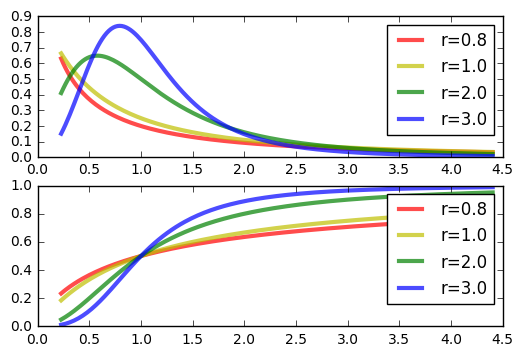

In [11]:
ax21.plot(x, rvs_fisk[0].pdf(x), 'r', lw=3, alpha=0.7, label='r='+str(c3[0]))
ax21.plot(x, rvs_fisk[1].pdf(x), 'y', lw=3, alpha=0.7, label='r='+str(c3[1]))
ax21.plot(x, rvs_fisk[2].pdf(x), 'g', lw=3, alpha=0.7, label='r='+str(c3[2]))
ax21.plot(x, rvs_fisk[3].pdf(x), 'b', lw=3, alpha=0.7, label='r='+str(c3[3]))
first_legend = ax21.legend(loc=1)
ax22.plot(x, rvs_fisk[0].cdf(x), 'r', lw=3, alpha=0.7, label='r='+str(c3[0]))
ax22.plot(x, rvs_fisk[1].cdf(x), 'y', lw=3, alpha=0.7, label='r='+str(c3[1]))
ax22.plot(x, rvs_fisk[2].cdf(x), 'g', lw=3, alpha=0.7, label='r='+str(c3[2]))
ax22.plot(x, rvs_fisk[3].cdf(x), 'b', lw=3, alpha=0.7, label='r='+str(c3[3]))
# plt.ylim((0,1.2))
second_legend = ax22.legend(loc=4)
plt.legend()
plt.show()

### Plot for Weibull distribution for different values of shape parameter

In [12]:
fig3, (ax31, ax32) = plt.subplots(2,1)

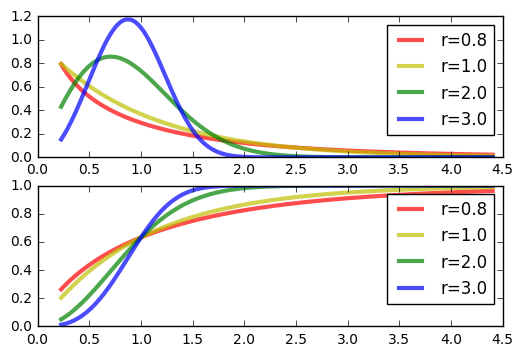

In [13]:
ax31.plot(x, rvs_weib[0].pdf(x), 'r', lw=3, alpha=0.7, label='r='+str(c3[0]))
ax31.plot(x, rvs_weib[1].pdf(x), 'y', lw=3, alpha=0.7, label='r='+str(c3[1]))
ax31.plot(x, rvs_weib[2].pdf(x), 'g', lw=3, alpha=0.7, label='r='+str(c3[2]))
ax31.plot(x, rvs_weib[3].pdf(x), 'b', lw=3, alpha=0.7, label='r='+str(c3[3]))
first_legend = ax31.legend(loc=1)
ax32.plot(x, rvs_weib[0].cdf(x), 'r', lw=3, alpha=0.7, label='r='+str(c3[0]))
ax32.plot(x, rvs_weib[1].cdf(x), 'y', lw=3, alpha=0.7, label='r='+str(c3[1]))
ax32.plot(x, rvs_weib[2].cdf(x), 'g', lw=3, alpha=0.7, label='r='+str(c3[2]))
ax32.plot(x, rvs_weib[3].cdf(x), 'b', lw=3, alpha=0.7, label='r='+str(c3[3]))
# plt.ylim((0,1.2))
second_legend = ax32.legend(loc=4)
plt.legend()
plt.show()

### Plot for Lognormal distribution for different values of shape parameter

In [14]:
fig4, (ax41, ax42) = plt.subplots(2,1)

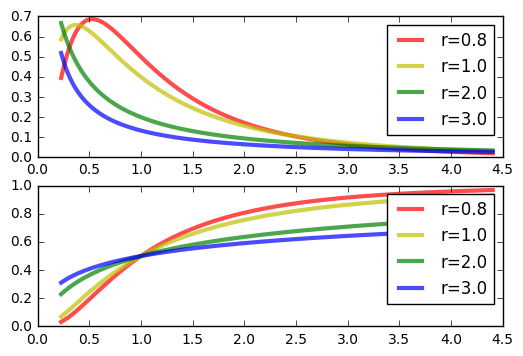

In [15]:
ax41.plot(x, rvs_lognormal[0].pdf(x), 'r', lw=3, alpha=0.7, label='r='+str(c3[0]))
ax41.plot(x, rvs_lognormal[1].pdf(x), 'y', lw=3, alpha=0.7, label='r='+str(c3[1]))
ax41.plot(x, rvs_lognormal[2].pdf(x), 'g', lw=3, alpha=0.7, label='r='+str(c3[2]))
ax41.plot(x, rvs_lognormal[3].pdf(x), 'b', lw=3, alpha=0.7, label='r='+str(c3[3]))
first_legend = ax41.legend(loc=1)
ax42.plot(x, rvs_lognormal[0].cdf(x), 'r', lw=3, alpha=0.7, label='r='+str(c3[0]))
ax42.plot(x, rvs_lognormal[1].cdf(x), 'y', lw=3, alpha=0.7, label='r='+str(c3[1]))
ax42.plot(x, rvs_lognormal[2].cdf(x), 'g', lw=3, alpha=0.7, label='r='+str(c3[2]))
ax42.plot(x, rvs_lognormal[3].cdf(x), 'b', lw=3, alpha=0.7, label='r='+str(c3[3]))
# plt.ylim((0,1.2))
second_legend = ax42.legend(loc=4)
plt.legend()
plt.show()

### Fitting leukemia data with weibull distribution


In [16]:
Y_uncensored = Y[Z==0].reshape(-1,1)
Y_censored = Y[Z==1].reshape(-1,1)
# Y_original_uncensored = Y_original[Z==0].reshape(-1,1)
# Y_original_censored = Y_original[Z==1].reshape(-1,1)
X_uncensored= X[Z==0]
X_censored= X[Z==1]
print(Y_uncensored.shape)

(879, 1)


/u/26/dhakaa1/unix/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8 but corresponding boolean dimension is 1
/u/26/dhakaa1/unix/anaconda2/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 8 but corresponding boolean dimension is 1


In [17]:
params = fisk.fit(Y_uncensored)

In [18]:
print(params)

(0.88446596650066001, 0.0074085411531594324, 0.92647401235776106)


### Fitting just a few datapoints to Weibull distribution

Just fit the distribution to the uncensored data, the standard pdf function given in scipy implementation only works for the uncensored cases. For the censored cases, the function has to be modified as we see later.

Take one sample which is uncensored and fit the distribution on one data point.

[[ 1.39280574]]


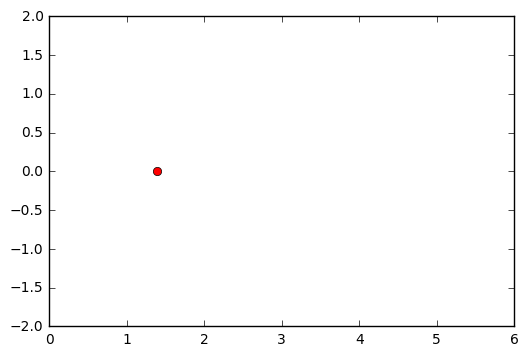

In [21]:
seed =  9920
np.random.seed(seed=seed)
N = 1
uncensored_ind = np.random.choice(len(Y_uncensored), N)
Y_uncensored_samples = Y_uncensored[uncensored_ind,:]
plt.plot( Y_uncensored_samples,np.zeros(N), 'ro')
print(Y_uncensored_samples)
plt.axis([0, 6, -2, 2])
plt.show()
plt.show()

(382456552.10451555, 0, 1.3928057360230874)
(1, 0, 1.3927734375000012)
(2.4340820312500036, 0, 1)


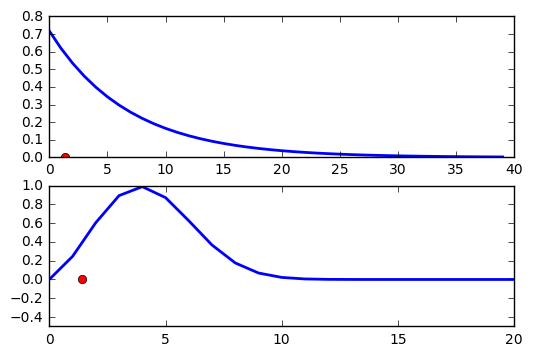

In [22]:
loc, scale = 0, 3.93030013
# params_w_sam = stats.weibull_min.fit_loc_scale(Y_uncensored_samples,1, 1)
params_weib_sam1 = stats.weibull_min.fit(Y_uncensored_samples, floc=0)
params_weib_sam2 = stats.weibull_min.fit(Y_uncensored_samples, floc=0, f0=1)
params_weib_sam3 = stats.weibull_min.fit(Y_uncensored_samples, floc=0, fscale=1)
fig4, (ax41, ax42) = plt.subplots(2,1)
# params_weib_sam3 = stats.weibull_min.fit(Y_uncensored_samples, floc=0, shape=1)
print(params_weib_sam1)
print(params_weib_sam2)
print(params_weib_sam3)
#### Plotting
# Histogram first
# Using all params and the stats function
ax41.plot( Y_uncensored_samples,np.zeros(N), 'ro')
ax41.plot(stats.weibull_min.pdf(np.linspace(0,8,40), *params_weib_sam2), lw=2,label='scipy')
ax42.plot( Y_uncensored_samples,np.zeros(N), 'ro')
ax42.plot(stats.weibull_min.pdf(np.linspace(0,8,40), *params_weib_sam3), lw=2,label='scipy')
plt.xlim((0,20))
plt.ylim((-0.5,1.0))
plt.show()

### Fitting just a few datapoints to loglogistic distribution

Now we fit fisk distribution on just one sample from the data. In the first plot, we fix the shape parameter equal to 1 and optimize the scale parameter with the data, while in the other plot, we fix the scale for the distribution equal to 1, and optimise the shape parameter.

(1723106786.4321413, 0, 1.3928057365305841)
(1, 0, 1.3927734375000012)
(4.6583007812500075, 0, 1)


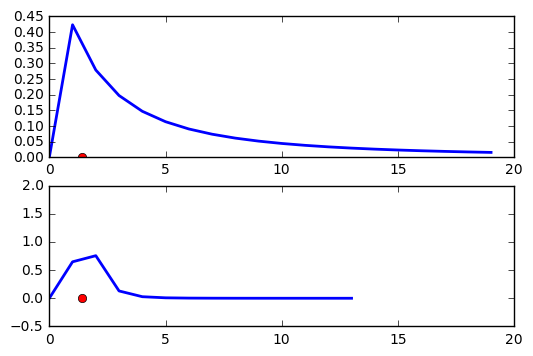

In [25]:
loc, scale = 0, 3.93030013
# params_w_sam = stats.weibull_min.fit_loc_scale(Y_uncensored_samples,1, 1)
params_fisk_sam1 = stats.fisk.fit(Y_uncensored_samples, floc=0)
params_fisk_sam2 = stats.fisk.fit(Y_uncensored_samples, floc=0, f0=1)
params_fisk_sam3 = stats.fisk.fit(Y_uncensored_samples, floc=0, fscale=1)
fig4, (ax41, ax42) = plt.subplots(2,1)
# params_weib_sam3 = stats.weibull_min.fit(Y_uncensored_samples, floc=0, shape=1)
print(params_fisk_sam1)
print(params_fisk_sam2)
print(params_fisk_sam3)
#### Plotting
# Histogram first
# Using all params and the stats function
ax41.plot( Y_uncensored_samples,np.zeros(N), 'ro')
ax41.plot(stats.fisk.pdf(np.linspace(0,8,20), *params_fisk_sam2), lw=2,label='scipy')
ax42.plot( Y_uncensored_samples,np.zeros(N), 'ro')
ax42.plot(stats.fisk.pdf(np.linspace(0,8,14), *params_fisk_sam3), lw=2,label='scipy')
plt.xlim((0,20))
plt.ylim((-0.5,2.0))
plt.show()

### Fitting Fisk distribution using the whole uncensored data.

(0.93606580494364344, 0, 0.77805783622953828)
(1, 0, 0.78642578124999984)
(0.93486328124999996, 0, 1)


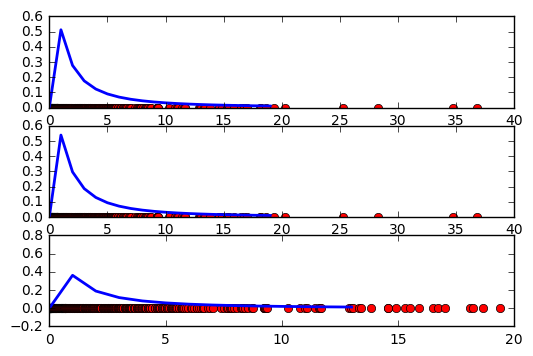

In [42]:
loc, scale = 0, 3.93030013
# params_w_sam = stats.weibull_min.fit_loc_scale(Y_uncensored_samples,1, 1)
params_fisk_full1 = stats.fisk.fit(Y_uncensored, floc=0)
params_fisk_full2 = stats.fisk.fit(Y_uncensored, floc=0, f0=1)
params_fisk_full3 = stats.fisk.fit(Y_uncensored, floc=0, fscale=1)
fig5, (ax51, ax52, ax53) = plt.subplots(3,1)
# params_weib_sam3 = stats.weibull_min.fit(Y_uncensored_samples, floc=0, shape=1)
print(params_fisk_full1)
print(params_fisk_full2)
print(params_fisk_full3)
#### Plotting
# Histogram first
# Using all params and the stats function
ax51.plot( Y_uncensored,np.zeros(len(Y_uncensored)), 'ro')
ax51.plot(stats.fisk.pdf(np.linspace(0,8,20), *params_fisk_full1), lw=2,label='scipy')
ax52.plot( Y_uncensored,np.zeros(len(Y_uncensored)), 'ro')
ax52.plot(stats.fisk.pdf(np.linspace(0,8,20), *params_fisk_full2), lw=2,label='scipy')
ax53.plot( Y_uncensored,np.zeros(len(Y_uncensored)), 'ro')
ax53.plot(stats.fisk.pdf(np.linspace(0,8,14), *params_fisk_full3), lw=2,label='scipy')
plt.xlim((0,20))
plt.ylim((-0.2,0.8))
plt.show()

### Fitting Weibull distribution using the whole uncensored data.

(0.65300820292626116, 0, 1.6031273252879379)
(1, 0, 2.1910698446092334)
(0.58740234374999967, 0, 1)


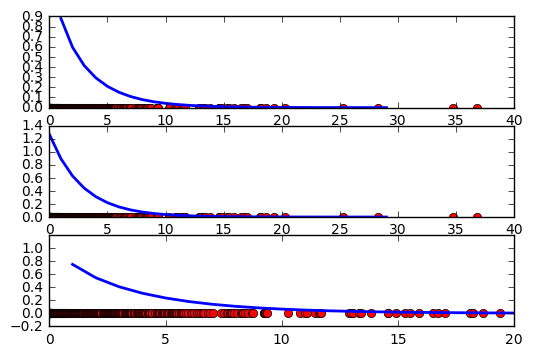

In [43]:
loc, scale = 0, 3.93030013
# params_w_sam = stats.weibull_min.fit_loc_scale(Y_uncensored_samples,1, 1)
params_weib_full1 = stats.weibull_min.fit(Y_uncensored, floc=0)
params_weib_full2 = stats.weibull_min.fit(Y_uncensored, floc=0, f0=1)
params_weib_full3 = stats.weibull_min.fit(Y_uncensored, floc=0, fscale=1)
fig6, (ax61, ax62, ax63) = plt.subplots(3,1)
# params_weib_sam3 = stats.weibull_min.fit(Y_uncensored_samples, floc=0, shape=1)
print(params_weib_full1)
print(params_weib_full2)
print(params_weib_full3)
#### Plotting
# Histogram first
# Using all params and the stats function
ax61.plot( Y_uncensored,np.zeros(len(Y_uncensored)), 'ro')
ax61.plot(stats.weibull_min.pdf(np.linspace(0,8,30), *params_fisk_full1), lw=2,label='scipy')
ax62.plot( Y_uncensored,np.zeros(len(Y_uncensored)), 'ro')
ax62.plot(stats.weibull_min.pdf(np.linspace(0,8,30), *params_fisk_full2), lw=2,label='scipy')
ax63.plot( Y_uncensored,np.zeros(len(Y_uncensored)), 'ro')
ax63.plot(stats.weibull_min.pdf(np.linspace(0,8,30), *params_fisk_full3), lw=2,label='scipy')
plt.xlim((0,20))
plt.ylim((-0.2,1.2))
plt.show()

###  Fitting leukemia data only on uncensored observations with Weibull distribution

For a censored observation, the likelihood is basically the survival function i.e. : 
$$ S(t)= 1 - \int_{-\inf}^{T}f(t) $$
$$  S(t)=\int_{T}^{\inf}f(t) $$
where T is the time when the event occurred.

The combined likelihood is then a product of all the normal uncensored observations and sencored observations with the above form.

Here we make two seperate classes one each for Weibull and fisk distribution which takes into account right censoring in the observation. Right censoring shifts the mass of the distribution rightwards to the location of the data point on the x axis.

In [44]:
def survival_weibull(x,shape, scale):
    shape = np.array(shape)
    scale = np.array(scale)
    y = x/scale    
    lnpdf = -(y**shape)

    # alternate
    lnpdf2 = (-(stats.expon.logpdf(y) + np.log(scale)))**shape
    pdf = np.exp(lnpdf)
    return pdf, lnpdf

In [46]:
import paramz

In [48]:
class Weibull_censored(paramz.Model):
    def __init__(self, x, r, s, name='surv'):
        super(Weibull_censored, self).__init__(name=name)
        self.r = paramz.Param('shape', r)
        self.s = paramz.Param('scale', s)
        self.link_parameter(self.r)
        self.link_parameter(self.s)
        self.x = x
    def objective_function(self):
        y = self.x/self.s    
#         lnpdf = -(y**self.r)
        lnpdf = (y**self.r)
        lnpdf = lnpdf.sum(axis=0)
        return lnpdf
    def grad_func_r(self):
        dlnpdf_dr = (self.y**self.r)*np.log(self.y)
        return dlnpdf_dr.sum()
    def grad_func_s(self):
        dlnpdf_ds = -self.r*(self.y**self.r)/self.s
        return dlnpdf_ds.sum()
    def parameters_changed(self):
        self.y = self.x/self.scale
        logL = self.objective_function()
        self.r.gradient[:] = self.grad_func_r()
        self.s.gradient[:] = self.grad_func_s()
        

In [49]:
class Fisk_censored(paramz.Model):
    def __init__(self, x, r, s, name="fisk-cens"):
        super(Fisk_censored, self).__init__(name=name)
        self.r = paramz.Param('shape', r)
        self.s = paramz.Param('scale', s)
        self.link_parameter(self.r)
        self.link_parameter(self.s)
        self.x = x
    def objective_function(self):
        y = self.x/self.s
        lnpdf = np.log(1/(1+y**self.r))
        nlnpdf = np.log(1+y**self.r)
        lnpdf = nlnpdf.sum(axis=0)
        return lnpdf
    def grad_func_r(self):
        dlnpdf_dr = (self.y**self.r)*np.log(self.y)/ (1+self.y**self.r)
        return dlnpdf_dr.sum()
    def grad_func_s(self):
        dlnpdf_ds = 0
        dlnpdf_ds = -self.y**self.r*self.r/(self.s *(1+self.y**self.r))
        dlnpdf_ds= dlnpdf_ds.sum()
        return dlnpdf_ds
    def parameters_changed(self):
        self.y = self.x/self.scale
        logL = self.objective_function()
        self.r.gradient[:] = self.grad_func_r()
        self.s.gradient[:] = self.grad_func_s()    

In [60]:
m = Weibull_censored(Y_censored, 1, 20)

In [61]:
m.checkgrad(verbose=1)
m.constrain_positive()
m.s.fix()

     Name      |     Ratio     |  Difference   |  Analytical   |   Numerical   |   dF_ratio    
-----------------------------------------------------------------------------------------------
 surv.shape    |   1.000000    |   0.000000    |   -9.941537   |   -9.941537   |     2e-07     
 surv.scale    |   1.000000    |   0.000000    |   -5.481302   |   -5.481302   |     1e-07     


array([0])

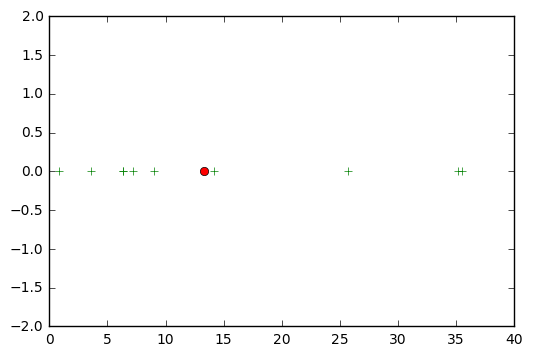

In [74]:
seed =  234
np.random.seed(seed=seed)
N = 10
censored_ind = np.random.choice(len(Y_censored), N)
Y_censored_samples = Y_censored[censored_ind,:]
N2 = 1
cens_ind = np.random.choice(len(Y_censored), N2)
Y_cens_sample = Y_censored[cens_ind,:]

plt.plot( Y_censored_samples,np.zeros(N), 'g+')
plt.plot( Y_cens_sample,np.zeros(N2), 'ro')
# print(Y_censored_samples)
plt.axis([0, 40, -2, 2])
plt.show()
plt.show()

In [62]:
m.optimize()

In [63]:
print(m.s)
print(m.r)

  index  |  surv.scale  |  constraints
  [0]    |  20.00000000  |   fixed +ve 
  index  |  surv.shape  |  constraints
  [0]    |  1.24331657  |      +ve    


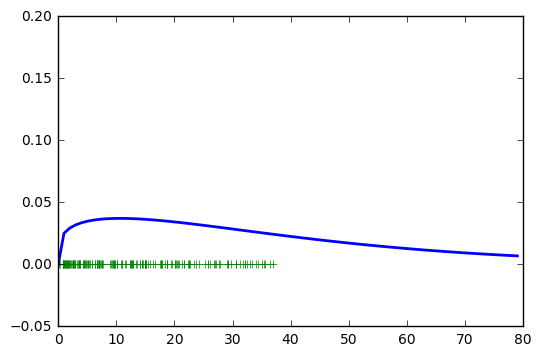

In [73]:
fig, ax5 = plt.subplots(1,1)
params_cens = ((m.r, 0, m.s))
ax5.plot(Y_censored,np.zeros(len(Y_censored)), 'g+')
ax5.plot(stats.weibull_min.pdf(np.linspace(0,40,80), *params_cens), lw=2,label='scipy')
plt.ylim((-0.05,0.2))
plt.show()

In [193]:
m2 = Weibull_censored(Y_cens_sample, 1, 13)
print(Y_cens_sample)

[[ 13.32796553]]


In [194]:
m2.constrain_positive()
# m2.s.fix()

In [195]:
m2.checkgrad()

array([ True], dtype=bool)

In [196]:
m2.optimize()

In [197]:
print(m2.r)
print(m2.s)

  index  |  surv.shape  |  constraints
  [0]    |  10.14911871  |      +ve    
  index  |  surv.scale  |  constraints
  [0]    |  43.17945170  |      +ve    


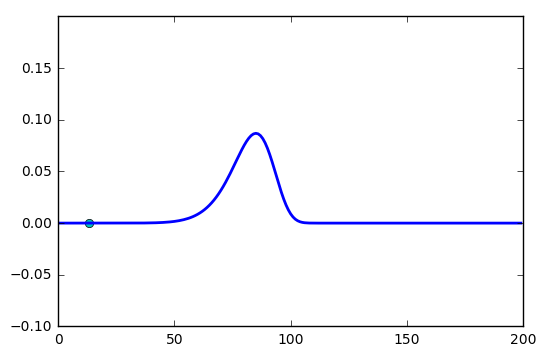

In [202]:
fig, ax6 = plt.subplots(1,1)
params_cens = ((m2.r, 0, m2.s))
ax6.plot(Y_cens_sample,np.zeros(len(Y_cens_sample)), 'co')
ax6.plot(stats.weibull_min.pdf(np.linspace(0,100,200), *params_cens), lw=2,label='scipy')
plt.ylim((-0.1,0.2))
plt.show()

In [241]:
m_fisk = Fisk_censored(Y_censored, 1, 20)
print(np.mean(Y_censored))
print(len(Y_censored))

13.3690287291
164


In [242]:
m_fisk.constrain_positive()
m_fisk.s.fix()

array([0])

In [243]:
m_fisk.checkgrad()

array([ True], dtype=bool)

In [244]:
m_fisk.optimize()

In [245]:
print(m_fisk.r)
print(m_fisk.s)

  index  |  fisk_m_cens.shape  |  constraints
  [0]    |         1.95518594  |      +ve    
  index  |  fisk_m_cens.scale  |  constraints
  [0]    |        20.00000000  |   fixed +ve 


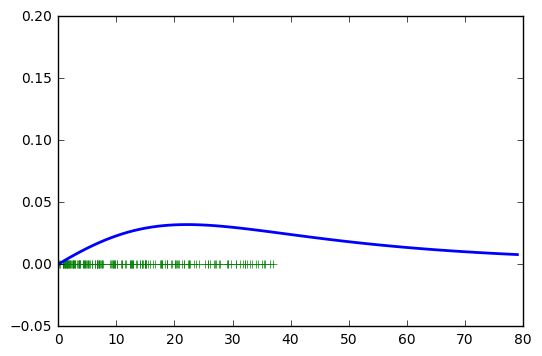

In [256]:
fig, ax6 = plt.subplots(1,1)
params_cens = ((m_fisk.r, 0, m_fisk.s))
ax6.plot(Y_censored,np.zeros(len(Y_censored)), 'g+')
ax6.plot(stats.fisk.pdf(np.linspace(0,40,80), *params_cens), lw=2,label='scipy')
plt.ylim((-0.05,0.2))
plt.show()

In [328]:
m_fisk2 = Fisk_censored(Y_cens_sample, 1, 20)

In [329]:
m_fisk2.constrain_positive()
# m_fisk2.s.fix()

In [330]:
m_fisk2.checkgrad()

array([ True], dtype=bool)

In [331]:
print(m_fisk2.r)
print(m_fisk2.s)

  index  |  fisk_m_cens.shape  |  constraints
  [0]    |         1.00000000  |      +ve    
  index  |  fisk_m_cens.scale  |  constraints
  [0]    |        20.00000000  |      +ve    


In [332]:
m_fisk2.optimize()

In [333]:
print(m_fisk2.r)
print(m_fisk2.s)

  index  |  fisk_m_cens.shape  |  constraints
  [0]    |        15.28220469  |      +ve    
  index  |  fisk_m_cens.scale  |  constraints
  [0]    |        29.01413959  |      +ve    


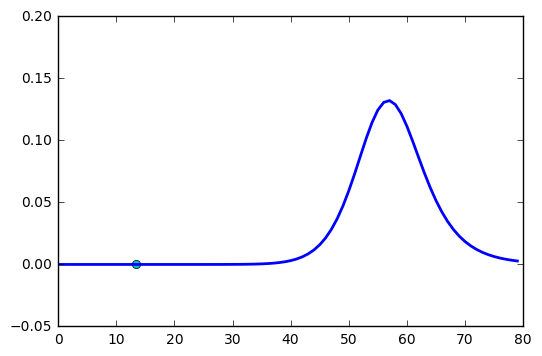

In [334]:
fig, ax6 = plt.subplots(1,1)
params_cens = ((m_fisk2.r, 0, m_fisk2.s))
ax6.plot(Y_cens_sample,np.zeros(len(Y_cens_sample)), 'co')
ax6.plot(stats.fisk.pdf(np.linspace(0,40,80), *params_cens), lw=2,label='scipy')
plt.ylim((-0.05,0.2))
plt.show()

In [ ]:
params_w1 = stats.weibull_min.fit(Y_uncensored, loc=0)
print(params_w1)
#### Plotting
# Histogram first
values,bins,hist = plt.hist(Y_uncensored,bins=51,range=(0,20),normed=True)
center = (bins[:-1] + bins[1:]) / 2.
# Using all params and the stats function
plt.plot( stats.weibull_min.pdf(np.linspace(0,20,40),*params_w1),lw=2,label='scipy')
# plt.xlim((0,10))
plt.ylim((0,1))
plt.show()

In [ ]:
data_sample = np.median(Y_censored)
params_w1 = stats.weibull_min.fit(Y_censored, loc=0)
print(params_w1)
#### Plotting
# Histogram first
values,bins,hist = plt.hist(Y_censored,bins=51,range=(0,40),normed=True)
center = (bins[:-1] + bins[1:]) / 2.
# Using all params and the stats function
plt.plot( stats.weibull_min.pdf(np.linspace(0,40,80),*params_w1),lw=4,label='scipy')
# plt.xlim((0,10))
# plt.ylim((0,2))
plt.show()

In [ ]:
print(np.min(Y_uncensored))
print(np.min(Y_censored))

In [ ]:
mean, var, skew, kurt = weibull_min.stats(r, moments='mvsk')

In [ ]:
weibull_min.ppf(0.99, r)

In [ ]:
r_ref= 1.9
weibull_min.ppf(0.01, r_ref),weibull_min.ppf(0.99, r_ref)
x1 = np.linspace(weibull_min.ppf(0.0005, r_ref),weibull_min.ppf(0.9999, r_ref), 200)
# x1 = np.linspace(0.1,4.1, 200)

In [ ]:
rvs_weibull = [weibull_min(i) for i in c2]

In [ ]:
fig2, (ax3, ax4) = plt.subplots(1,2)

In [ ]:
for i,rv_w in enumerate(rvs_weibull):
    colstr = str(cols[i])+'-'
    ax3.plot(x1, rv_w.pdf(x1), colstr, lw=3, alpha=0.7)
    ax4.plot(x1, rv_w.cdf(x1), colstr, lw=3, alpha=0.7)

In [ ]:
s = 0.92
x_min = lognorm.ppf(0.01, s)
x_max = lognorm.ppf(0.95, s)
print(x_min), print(x_max)
x2 = np.linspace(x_min, x_max, 100)

In [ ]:
rvs_lognormal = [lognorm(i) for i in c2]

In [ ]:
fig3, (ax5, ax6) = plt.subplots(1,2)

In [ ]:
for i, rv_ln in enumerate(rvs_lognormal):
    colstr = str(cols[i])+'-'
    ax5.plot(x2, rv_ln.pdf(x2), colstr, lw=3, alpha=0.7)
    ax6.plot(x2, rv_ln.cdf(x2), colstr, lw=3, alpha=0.7)

In [ ]:
ax1.set_title('loglogistic-pdf- shape')
ax2.set_title('loglogistic-cdf- shape')
ax3.set_title('weibull-pdf shape')
ax4.set_title('weibull-cdf shape')
ax5.set_title('lognormal-pdf shape')
ax6.set_title('lognormal-cdf shape')

In [ ]:
# plt.show()

In [ ]:
fig22,  ax22 = plt.subplots(1,1)

In [ ]:
r_l2 = 1.8

In [ ]:
# rvs1 = fisk.rvs(r_l1, size=1000)
rvs2 = fisk.rvs(r_l2, size=1000)

In [ ]:
# ax21.hist(rvs1, normed=True, histtype='stepfilled', alpha=0.2)
# ax21.legend(loc='best', frameon=False)

In [ ]:
ax22.hist(rvs2, normed=True, histtype='stepfilled', alpha=0.2)
ax22.legend(loc='best', frameon=False)

Plot of pdf, Hazard function and Survival function for fixed value of shape parameter 

In [ ]:
r_w, r_ll = 0.5, 1.5

In [ ]:
r_ref= 2.1
fisk.ppf(0.005, r_ref),fisk.ppf(0.95, r_ref)

In [ ]:
x2 = np.linspace(fisk.ppf(0.01, r_ref),fisk.ppf(0.99, r_ref), 200)

In [ ]:
rv_ll = fisk(r_ll) 

In [ ]:
fig33,(ax31, ax32, ax33) = plt.subplots(1,3)

In [ ]:
# Loglogistic
ax31.plot(x2, rv_ll.pdf(x2), 'b-', lw=2.5, alpha=0.6, label='pdf')
ax31.plot(x2, 1 - rv_ll.cdf(x2), 'g-', lw=2.5, alpha=0.6, label='survival')
ax31.plot(x2, rv_ll.pdf(x2) / (1 - rv_ll.cdf(x2)), 'r-', lw=2.5, alpha=0.6,label='hazard')
legend31 = ax31.legend(loc='upper right')
ax31.set_title('survival, hazard functions for loglogistic likelihood')
ax31.set_xbound(0,8)

In [ ]:
r_ref= 1.2
weibull_min.ppf(0.0005, r_ref), weibull_min.ppf(0.9999, r_ref)

In [ ]:
x3 = np.linspace(weibull_min.ppf(0.01, r_ref),weibull_min.ppf(0.9999, r_ref), 300)
rv_we = weibull_min(r_w) 

In [ ]:
# weibull
ax32.plot(x3, rv_we.pdf(x3), 'b-', lw=1.6, alpha=0.6, label='pdf')
ax32.plot(x3, 1 - rv_we.cdf(x3), 'g-', lw=1.6, alpha=0.6, label='survival')
ax32.plot(x3, rv_we.pdf(x3) / (1 - rv_we.cdf(x3)), 'r-', lw=1.6, alpha=0.6, label='hazard')
legend32 = ax32.legend(loc='upper right')
ax32.set_xbound(0,8)
ax32.set_title('survivial, hazard and failure density functions for weibull likelihood')

ax33.plot(x3, rv_ln.pdf(x3), 'b-', lw=1.6, alpha=0.6, label='pdf')
ax33.plot(x3, 1 - rv_ln.cdf(x3), 'g-', lw=1.6, alpha=0.6, label='survival')
ax33.plot(x3, rv_ln.pdf(x3) / (1 - rv_ln.cdf(x3)), 'r-', lw=1.6, alpha=0.6, label='hazard')
legend33 = ax33.legend(loc='upper right')
ax33.set_xbound(0,8)
# ax33.set_title('survivial, hazard and failure density functions for log-normal likelihood')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,9)

In [ ]:
plt.show()
